Тема: Определение мошеннических операций с картами
Задачи: Построить несколько бинарных классификаторов. Какие параметры вносят
наибольший вклад при определении мошеннических операций? Являются
ли мошеннические операции выбросами?

Классификатор типа Метод опорных векторов(SVM):

In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

X = balanced_data.iloc[:, :-1]
y = balanced_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
C = 1.0
svm_clf = SVC(kernel = 'linear', C = C)
svm_clf.fit(X_train, y_train)

SVC_prediction = svm_clf.predict(X_test)

print(classification_report(SVC_prediction, y_test))


              precision    recall  f1-score   support

           0       0.99      0.84      0.91       171
           1       0.82      0.98      0.89       125

    accuracy                           0.90       296
   macro avg       0.90      0.91      0.90       296
weighted avg       0.92      0.90      0.90       296



Классификатор типа Логистическая регрессия(Logistic Regression):

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

X = balanced_data.iloc[:, :-1]
y = balanced_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)

logreg_prediction = logreg_clf.predict(X_test)

print(classification_report(logreg_prediction, y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       162
           1       0.89      0.99      0.94       134

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



Классификаторы типа Дерева решений (Decision Tree Classifier), Случайный Лес (англ. Random Forest):

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

# выделение целевого признака и удаление его из данных для обучения
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

X = balanced_data.iloc[:, :-1]
y = balanced_data.iloc[:, -1]
# разбиение на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

# обучение модели дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# оценка точности модели на тестовой выборке
y_pred = tree_clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Метрики для модели дерева решений:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# обучение модели случайного леса с перебором гиперпараметров
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [3, 5, 10, 20]}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# вывод лучших параметров и оценка точности модели на тестовой выборке
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Метрики для модели случайного леса:")
print("Лучшие параметры: ", best_params)
print("Лучшая точность на кросс-валидации: ", best_score)
print(classification_report(y_test, y_pred))

Метрики для модели дерева решений:
Precision:  0.7829604014869578
Recall:  0.762051282051282
F1-score:  0.7577131019869227


C:\Users\aramm\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Метрики для модели случайного леса:
Лучшие параметры:  {'max_depth': 3, 'n_estimators': 50}
Лучшая точность на кросс-валидации:  0.8
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       489
           1       0.84      0.86      0.85       486

    accuracy                           0.85       975
   macro avg       0.85      0.85      0.85       975
weighted avg       0.85      0.85      0.85       975



In [3]:
import pandas as pd

data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
transaction_amounts = data['Amount']

mean = np.mean(transaction_amounts)
std = np.std(transaction_amounts)
# Определение квантилей для каждого столбца
q1 = np.percentile(transaction_amounts, 25)
q3 = np.percentile(transaction_amounts, 75)
iqr = q3 - q1
# Определение границ для выявления выбросов
low_limit = q1 - (1.5 * iqr)
high_limit = q3 + (1.5 * iqr)
# Определение наличия выбросов
outliers = transaction_amounts[(transaction_amounts < low_limit) | (transaction_amounts > high_limit)]
print(outliers)
print('-----------------------------------------------------------------------------------------------------------------------')
import numpy as np
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
transaction_amounts = data['Amount']

mean = np.mean(transaction_amounts)
std = np.std(transaction_amounts)
lower_bound = mean - (3*std)
upper_bound = mean + (3*std)

outliers = transaction_amounts[(transaction_amounts < lower_bound) | (transaction_amounts > upper_bound)]
print(outliers)

2          378.66
20         231.71
51        1402.95
64         243.66
85         200.01
           ...   
284735     381.05
284748     220.28
284753     337.54
284757     200.00
284806     217.00
Name: Amount, Length: 31904, dtype: float64
51         1402.95
89         1142.02
140         919.60
150         937.69
164        3828.04
            ...   
284249    10199.44
284290      897.00
284383     1114.00
284497     1484.66
284528      900.00
Name: Amount, Length: 4076, dtype: float64


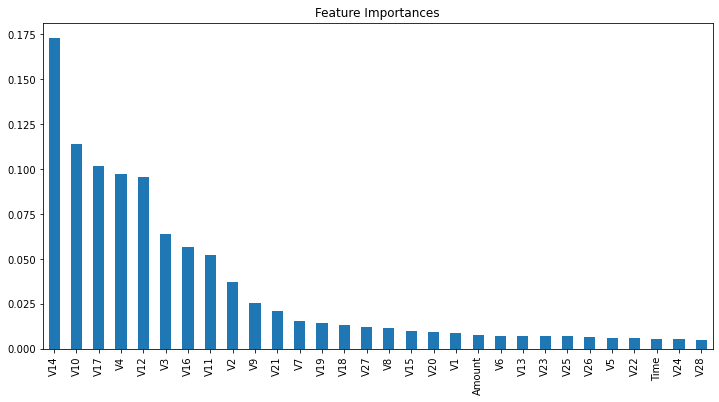

V14    0.172929
V10    0.113698
V17    0.101510
V4     0.097196
V12    0.095531
V3     0.063638
V16    0.056439
V11    0.052083
V2     0.036996
V9     0.025669
dtype: float64


In [7]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# загрузка данных и подготовка признаков и меток
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

X = balanced_data.iloc[:, :-1]
y = balanced_data.iloc[:, -1]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)


sorted_importances = feature_importances.sort_values(ascending=False)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
sorted_importances.plot(kind="bar")
plt.show()


print(sorted_importances.head(10))


Какие параметры вносят наибольший вклад при определении мошеннических операций?

Наибольший вклад в определение мошеннических операций вносят параметры: V14, V10, V17.

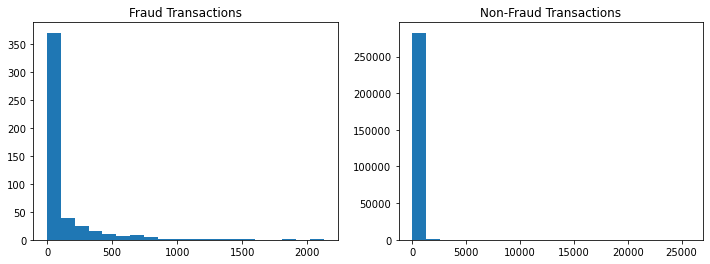

In [8]:
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

X = balanced_data.iloc[:, :-1]
y = balanced_data.iloc[:, -1]
# отфильтруем данные для мошеннических и немошеннических операций
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

# построим гистограммы для признака "Amount"
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(fraud_data['Amount'], bins=20)
axs[0].set_title('Fraud Transactions')
axs[1].hist(non_fraud_data['Amount'], bins=20)
axs[1].set_title('Non-Fraud Transactions')
plt.show()


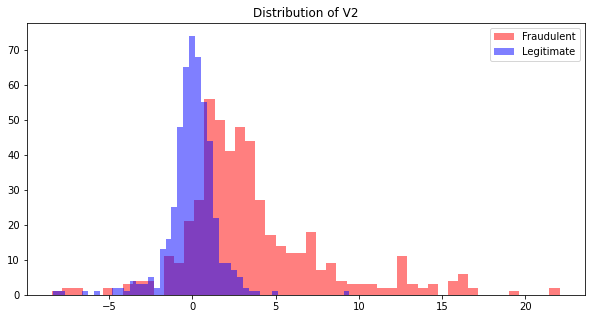

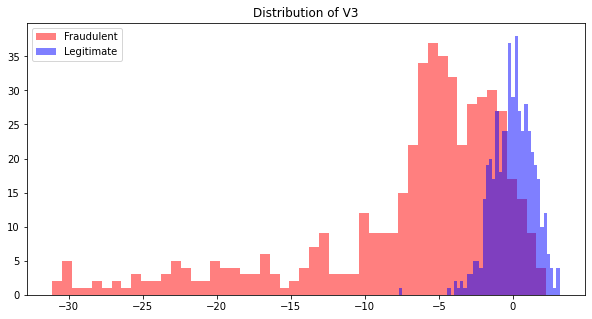

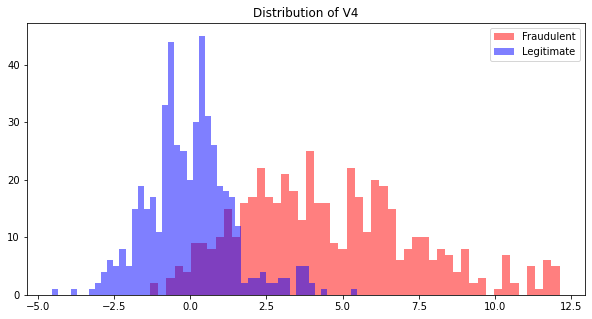

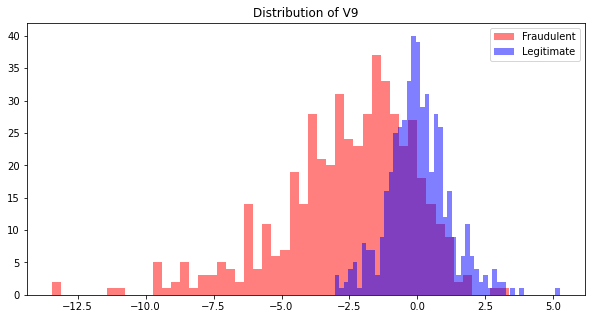

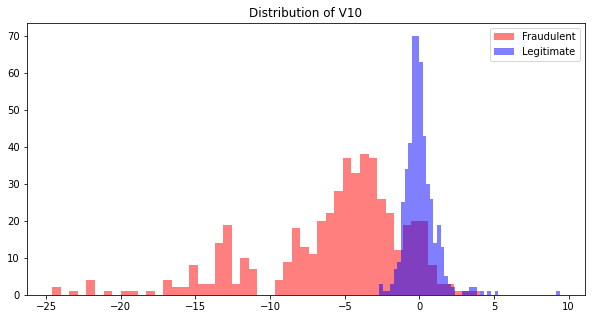

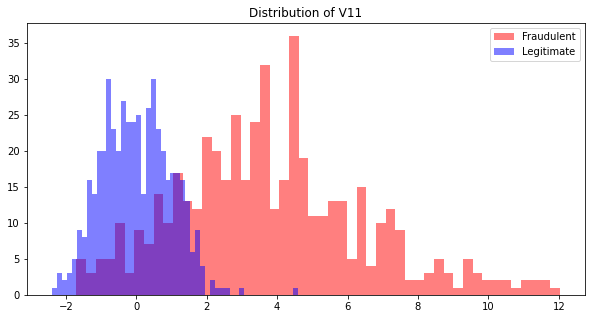

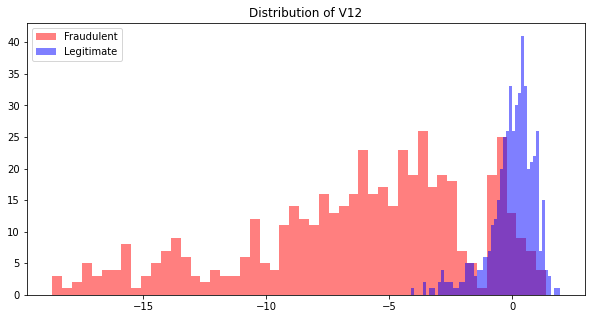

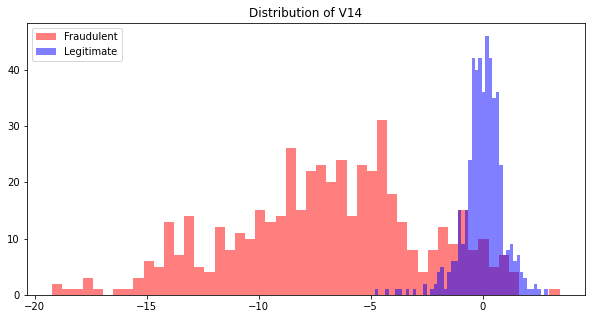

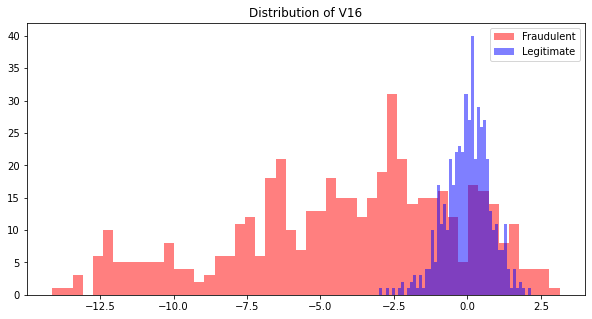

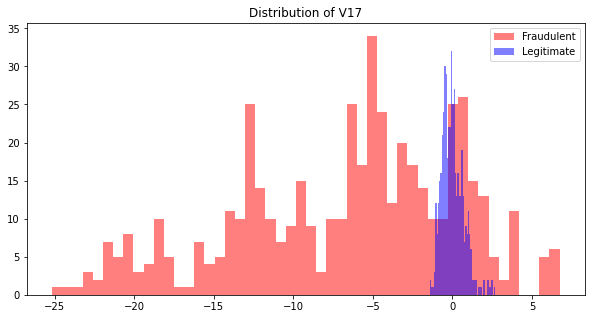

In [99]:
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")

# Отбираем признаки, важность которых была высокой согласно модели случайного леса
important_features = ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

# Создаем два набора данных - мошеннические операции и немошеннические операции
fraudulent_data = balanced_data[balanced_data['Class'] == 1]
legitimate_data = balanced_data[balanced_data['Class'] == 0]

# Строим гистограммы распределения значений каждого признака для мошеннических и немошеннических операций
for feature in important_features:
    plt.figure(figsize=(10, 5))
    plt.hist(fraudulent_data[feature], bins=50, alpha=0.5, color='red', label='Fraudulent')
    plt.hist(legitimate_data[feature], bins=50, alpha=0.5, color='blue', label='Legitimate')
    plt.title('Distribution of {}'.format(feature))
    plt.legend()
    plt.show()


Посмотрев на графики, можно заметить, что распределения значений для мошеннических и немошеннических операций отличаются друг от друга, следовательно можно предположить, что мошеннические операции являются выбросами.

C:\Users\aramm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


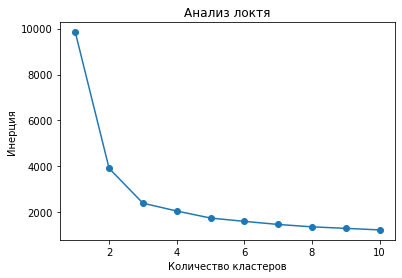

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Выбор значимых признаков
important_features = balanced_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предварительная обработка данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(important_features)

# Выполнение анализа локтя для разного количества кластеров
inertia = []
for k in range(1, 11):  # Проверяем количество кластеров от 1 до 10 (можно изменить диапазон)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=157)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Визуализация анализа локтя
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Анализ локтя')
plt.show()


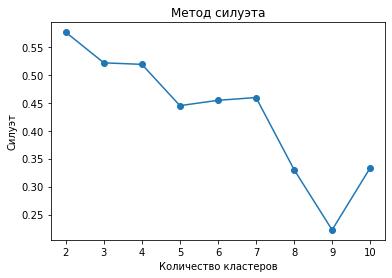

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Выбор значимых признаков
important_features = balanced_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предварительная обработка данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(important_features)

# Выполнение метода силуэта для разного количества кластеров
silhouette_scores = []
for k in range(2, 11):  # Проверяем количество кластеров от 2 до 10 (можно изменить диапазон)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=157)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Визуализация метода силуэта
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.title('Метод силуэта')
plt.show()


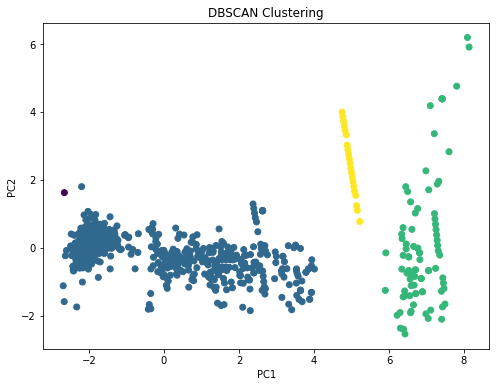

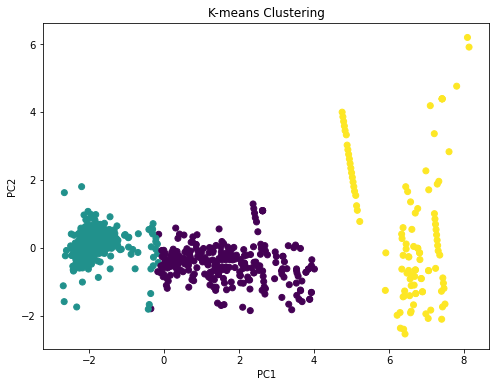

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Загрузка данных и выбор важных признаков
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Выбор значимых признаков
important_features = balanced_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(important_features)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=2.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Метод главных компонент для визуализации кластеров
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Визуализация кластеров DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Визуализация кластеров K-means
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [102]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Извлечение важных признаков
important_features = balanced_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(important_features)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Добавление целевой переменной (номера кластера)
important_features['Cluster'] = kmeans_labels

# Разделение данных на обучающую и тестовую выборки
X = important_features.drop('Cluster', axis=1)
y = important_features['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение модели дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

pca = PCA()
pca.fit(X)

# оценка точности модели на тестовой выборке
y_pred = tree_clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Метрики для модели дерева решений:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# обучение модели случайного леса с перебором гиперпараметров
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': [3, 5, 10, 20]}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# вывод лучших параметров и оценка точности модели на тестовой выборке
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Метрики для модели случайного леса:")
print("Лучшие параметры: ", best_params)
print("Лучшая точность на кросс-валидации: ", best_score)
print(classification_report(y_test, y_pred))

C:\Users\aramm\AppData\Local\Temp\ipykernel_16332\4027162533.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features['Cluster'] = kmeans_labels


Метрики для модели дерева решений:
Precision:  0.9748145255759469
Recall:  0.9746192893401016
F1-score:  0.9746838892797409
Метрики для модели случайного леса:
Лучшие параметры:  {'max_depth': 10, 'n_estimators': 100}
Лучшая точность на кросс-валидации:  0.9885592195436587
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.99       118
           2       1.00      1.00      1.00        26

    accuracy                           0.98       197
   macro avg       0.98      0.99      0.99       197
weighted avg       0.98      0.98      0.98       197



В целом, обе модели показывают высокую точность и хорошие метрики классификации кластеров. Это говорит о том, что модели успешно выделяют и классифицируют группы данных в кластерах, и могут быть использованы для обнаружения мошеннических транзакций на основе этих кластеров.

In [98]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Извлечение важных признаков
important_features = balanced_data[['Time', 'Amount', 'Class', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(important_features)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Интерпретация признаков
cluster_labels = kmeans_labels
unique_clusters = np.unique(cluster_labels)

for cluster in unique_clusters:
    cluster_data = important_features[cluster_labels == cluster]

    # Анализ времени и суммы транзакций
    avg_time = cluster_data['Time'].mean()
    avg_amount = cluster_data['Amount'].mean()
    # Дополнительный анализ времени и суммы транзакций

    # Анализ классов
    fraud_percentage = (cluster_data['Class'] == 1).mean()
    # Дополнительный анализ классов

    # Анализ идентификационных данных
    identification_data = cluster_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]
    # Дополнительный анализ идентификационных данных

    # Вывод результатов анализа
    print(f'Cluster {cluster}:')
    print(f'Average Time: {avg_time}')
    print(f'Average Amount: {avg_amount}')
    print(f'Percentage of Fraudulent Transactions: {fraud_percentage}')
    # Вывод дополнительных результатов

    print('\n')


Cluster 0:
Average Time: 87143.77397260274
Average Amount: 124.85106164383552
Percentage of Fraudulent Transactions: 1.0


Cluster 1:
Average Time: 94706.7094017094
Average Amount: 92.88011965811963
Percentage of Fraudulent Transactions: 0.15897435897435896


Cluster 2:
Average Time: 52747.46728971963
Average Amount: 82.87831775700928
Percentage of Fraudulent Transactions: 1.0




Кластер 0:

Среднее значение времени транзакций в данном кластере составляет примерно 87144 единицы.
Среднее значение суммы транзакций в данном кластере составляет около 124.85.
Все транзакции в данном кластере являются мошенническими, так как процент мошеннических транзакций равен 100%.

Кластер 1:

Среднее значение времени транзакций в данном кластере составляет примерно 94707 единиц.
Среднее значение суммы транзакций в данном кластере составляет около 92.88.
Процент мошеннических транзакций в данном кластере составляет около 15.9%.

Кластер 2:

Среднее значение времени транзакций в данном кластере составляет примерно 52747 единиц.
Среднее значение суммы транзакций в данном кластере составляет около 82.88.
Все транзакции в данном кластере являются мошенническими, так как процент мошеннических транзакций равен 100%.

Общий вывод:

Кластеры 0 и 2 полностью состоят из мошеннических транзакций, в то время как кластер 1 содержит как мошеннические, так и немошеннические транзакции.
Средние значения времени и суммы транзакций могут различаться между кластерами, что может указывать на различные характеристики мошеннических операций.

In [109]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Извлечение важных признаков
important_features = balanced_data[['Time', 'Amount', 'Class', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(important_features)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Добавление целевой переменной (номера кластера)
important_features['Cluster'] = kmeans_labels

# Идентификация характеристик кластеров
cluster_features = {}
for cluster in range(3):
    cluster_data = important_features[important_features['Cluster'] == cluster]
    cluster_features[cluster] = cluster_data.drop(['Cluster'], axis=1).mean()

# Вывод характеристик кластеров
for cluster, features in cluster_features.items():
    print(f'Cluster {cluster} Features:')
    for feature, value in features.items():
        print(f'{feature}: {value}')
    print('\n')


Cluster 0 Features:
Time: 87143.77397260274
Amount: 124.85106164383552
Class: 1.0
V2: 2.6352274260345294
V3: -4.914436414520984
V4: 3.9809400795577083
V9: -2.1139324971424207
V10: -4.564618071987572
V11: 3.6980357251091007
V12: -5.670323005484655
V14: -7.31059545974006
V16: -3.60023499878885
V17: -5.535880994625409


Cluster 1 Features:
Time: 94706.7094017094
Amount: 92.88011965811963
Class: 0.15897435897435896
V2: 0.0133313793090944
V3: -0.16236933160553613
V4: 0.2829907231257126
V9: 0.01344242402359334
V10: -0.037819330189184805
V11: 0.07800063771369276
V12: -0.10024574669216028
V14: -0.2296002266734749
V16: 0.0750862446106994
V17: 0.20935998039877868


Cluster 2 Features:
Time: 52747.46728971963
Amount: 82.87831775700928
Class: 1.0
V2: 9.44262309901969
V3: -18.215731043520364
V4: 8.348145068793388
V9: -6.001240943525278
V10: -13.272915905092612
V11: 7.000729841201988
V12: -12.7782141783811
V14: -10.774941364441853
V16: -9.568558660603456
V17: -16.650443399122917




C:\Users\aramm\AppData\Local\Temp\ipykernel_16332\1601098896.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features['Cluster'] = kmeans_labels


Кластер 0:

Время транзакций в этом кластере среднее и составляет около 87143.77.
Средний объем транзакций в этом кластере составляет около 124.85.
Все транзакции в этом кластере принадлежат к классу 1 (мошеннические транзакции).
Значения признаков V2, V3, V4, V9, V10, V11, V12, V14, V16, V17 в этом кластере имеют относительно большие абсолютные значения, что может свидетельствовать о сильной аномальности этих признаков.

Кластер 1:

Время транзакций в этом кластере среднее и составляет около 94706.71.
Средний объем транзакций в этом кластере составляет около 92.88.
Все транзакции в этом кластере принадлежат к классу 0 (немошеннические транзакции).
Значения признаков V2, V3, V4, V9, V10, V11, V12, V14, V16, V17 в этом кластере имеют относительно небольшие значения, близкие к нулю.

Кластер 2:

Время транзакций в этом кластере среднее и составляет около 52747.47.
Средний объем транзакций в этом кластере составляет около 82.88.
Все транзакции в этом кластере также принадлежат к классу 1 (мошеннические транзакции).
Значения признаков V2, V3, V4, V9, V10, V11, V12, V14, V16, V17 в этом кластере имеют относительно большие отрицательные значения, что может указывать на сильную аномальность этих признаков.

Исходя из этих данных, можно сделать вывод, что мошеннические операции характерны аномальными значениями признаков V1-V28, а также маленьким временем операций, в некоторых случаях также большим объемом транзакций.

C:\Users\aramm\AppData\Local\Temp\ipykernel_5104\1158600975.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features['Cluster'] = kmeans_labels


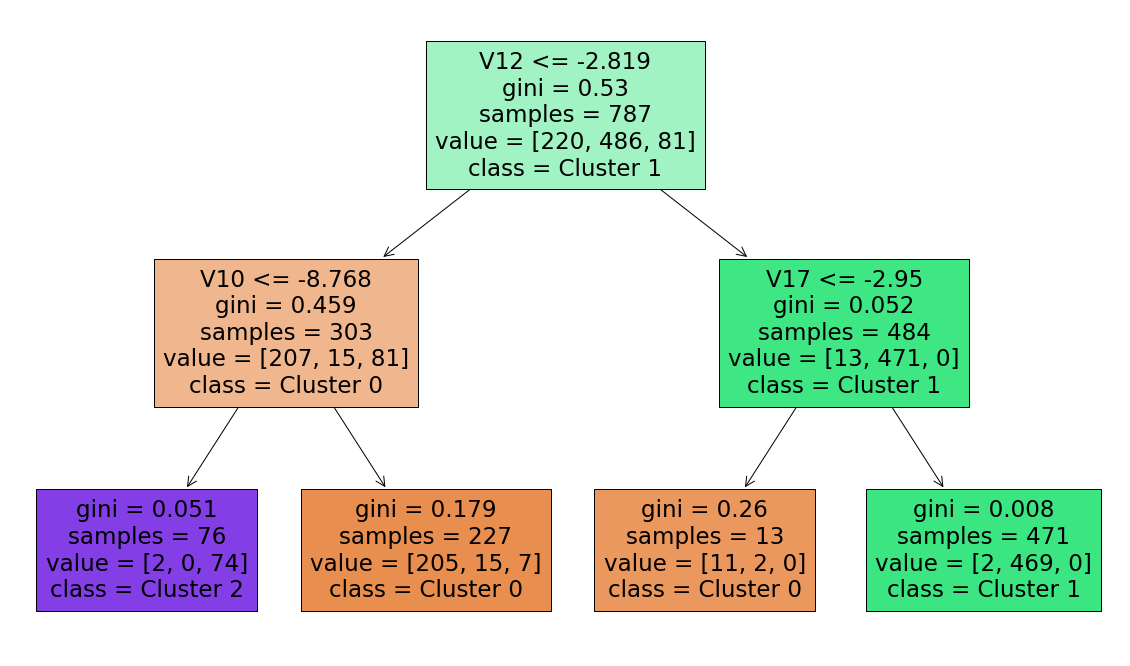

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Загрузка данных
data = pd.read_csv(r"C:\Users\aramm\OneDrive\Рабочий стол\Университет\Python\ML\creditcard.csv")
data_class_1 = data[data['Class'] == 1]
data_class_0 = data[data['Class'] == 0].sample(n=len(data_class_1), random_state=42)
balanced_data = pd.concat([data_class_1, data_class_0])

# Извлечение важных признаков
important_features = balanced_data[['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']]

# Предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(important_features)

# Кластеризация с помощью K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Добавление целевой переменной (номера кластера)
important_features['Cluster'] = kmeans_labels

# Разделение данных на обучающую и тестовую выборки
X = important_features.drop('Cluster', axis=1)
y = important_features['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели дерева решений
max_depth_to_exlude = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth_to_exlude, random_state=42)
tree_clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 12))
tree.plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

Количество уровней: 2 уровня.

Условия, соблюдая которые мы попадаем в кластер 2: 
V12 <= -2.819 and V10 <= -8.768

Условия, соблюдая которые мы попадаем в кластер 0: 
V12 <= -2.819 and V10 <= -8.768

Условия, соблюдая которые мы попадаем в кластер 0: 
V12 <= -2.819 and V17 <= -2.95

Условия, соблюдая которые мы попадаем в кластер 1: 
V12 <= -2.819 and V10 <= -2.95